<a href="https://colab.research.google.com/github/KVSSetty/DLtutorials/blob/master/catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()




Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kvssetty","key":"fc8062f9debcf6b9bf2d77098df3b1ac"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle competitions download -c dogs-vs-cats

 

 98% 795M/812M [00:03<00:00, 217MB/s]
100% 812M/812M [00:03<00:00, 221MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip



In [ ]:
!unzip -qq train.zip







In [ ]:
import os, shutil, pathlib
  
original_dir = pathlib.Path("train")                          
new_base_dir = pathlib.Path("cats_vs_dogs_small")             
 
def make_subset(subset_name, start_index, end_index):         
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" 
                  for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
make_subset("train", start_index=0, end_index=1000)            
make_subset("validation", start_index=1000, end_index=1500)    
make_subset("test", start_index=1500, end_index=2500)






#Let us build a CNN

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
  
inputs = keras.Input(shape=(180, 180, 3))                            
x = layers.Rescaling(1./255)(inputs)                                 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 



In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## Data Preparation


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory



In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Displaying the shapes of the data and labels yielded by the Dataset

  


In [ ]:
for data_batch, labels_batch in train_dataset:
     print("data batch shape:", data_batch.shape)
     print("labels batch shape:", labels_batch.shape)
     break





data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


## Fitting the model using a Dataset




In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)



Epoch 1/30
63/63 [==============================] - 19s 83ms/step - loss: 0.7657 - accuracy: 0.5130 - val_loss: 0.6892 - val_accuracy: 0.5510
Epoch 2/30
63/63 [==============================] - 6s 86ms/step - loss: 0.7037 - accuracy: 0.5405 - val_loss: 0.6850 - val_accuracy: 0.5320
Epoch 3/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6924 - accuracy: 0.6220 - val_loss: 0.6285 - val_accuracy: 0.6270
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6182 - accuracy: 0.6695 - val_loss: 0.6290 - val_accuracy: 0.6570
Epoch 5/30
63/63 [==============================] - 5s 75ms/step - loss: 0.5954 - accuracy: 0.6915 - val_loss: 0.5821 - val_accuracy: 0.6940
Epoch 6/30
63/63 [==============================] - 5s 72ms/step - loss: 0.5477 - accuracy: 0.7300 - val_loss: 0.8202 - val_accuracy: 0.6580
Epoch 7/30
63/63 [==============================] - 5s 74ms/step - loss: 0.4938 - accuracy: 0.7590 - val_loss: 0.9304 - val_accuracy: 0.6350
Epoch 8/30
6

## Displaying curves of loss and accuracy during training



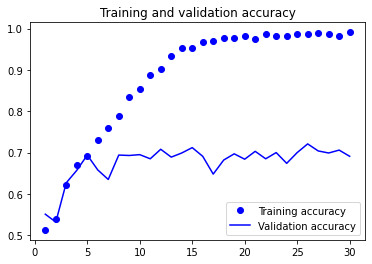

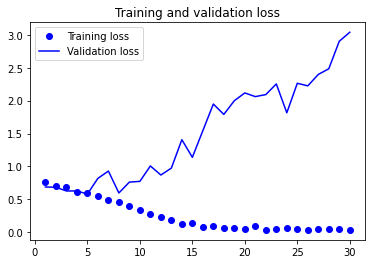

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()



## Evaluating the model on the test set



In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")



63/63 [==============================] - 3s 38ms/step - loss: 0.5833 - accuracy: 0.7015
Test accuracy: 0.701


In [1]:
# Mount Google DRive in Google Coloab
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive
